<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/Supervised_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("/content/fake_bills.csv")
df.head()

,is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length
0,True;171.81;104.86;104.95;4.52;2.89;112.83
1,True;171.46;103.36;103.66;3.77;2.99;113.09
2,True;172.69;104.48;103.5;4.4;2.94;113.16
3,True;171.36;103.91;103.94;3.62;3.01;113.51
4,True;171.73;104.28;103.46;4.04;3.48;112.54


In [10]:
df.describe()

,is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length
count,1500
unique,1500
top,True;171.81;104.86;104.95;4.52;2.89;112.83
freq,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 1 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length  1500 non-null   object
dtypes: object(1)
memory usage: 11.8+ KB


In [32]:
# Missing Data

missing_data = df.isnull().sum()
print(missing_data)

# is_genuine       0
# diagonal         0
# height_left      0
# height_right     0
# margin_low      37
# margin_up        0
# length           0


for column,count in missing_data.items():
    if count>0:
        df[column] = df[column].fillna(df[column].mean())
        print(f"{column} has {count} missing values")



is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


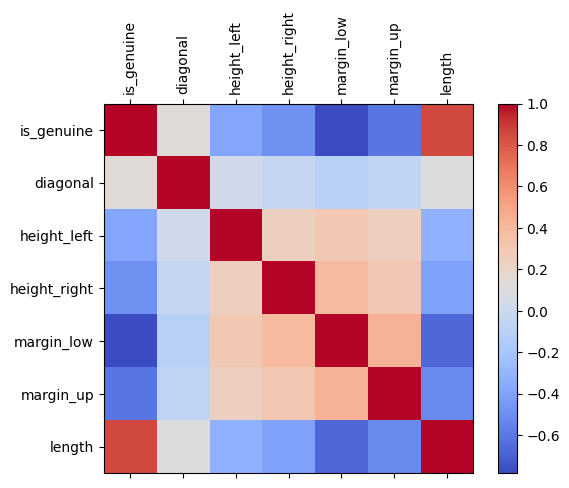

In [24]:
df = pd.read_csv("/content/fake_bills.csv", delimiter=';')
corr_matrix = df.corr()
fig, ax = plt.subplots()
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
plt.xticks(rotation=90)
plt.show()

In [33]:
le=LabelEncoder()
df['is_genuine']=le.fit_transform(df['is_genuine'])
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [34]:
y=df['is_genuine']
x=df.drop('is_genuine',axis=1)

In [35]:
scaler_x=StandardScaler()
x=scaler_x.fit_transform(x)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [42]:
df.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25
1499,0,171.47,104.15,103.82,4.63,3.37,112.07


In [43]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)
knn.score(x,y)
knn.predict([[172.00,104.02,104.03,4.46,3.01,111.23]])

array([1])

In [44]:
log=LogisticRegression()
log.fit(x_train,y_train)
log.score(x_train,y_train)

0.9916666666666667

In [45]:
log.predict([[172.00,104.02,104.03,4.46,3.01,111.23]])

array([1])

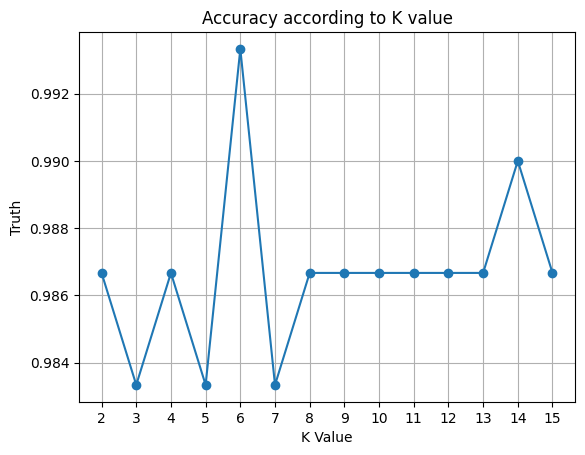

In [48]:
accuracy_values = []
k_values = []


for k in np.arange(2,16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)

plt.figure()
plt.plot(k_values, accuracy_values, marker = "o", linestyle = "-")
plt.title("Accuracy according to K value")
plt.xlabel("K Value")
plt.ylabel("Truth")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [49]:
y_pred=log.predict(x_test)

In [51]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("RMSE:",rmse)
print("R2:",r2)

RMSE: 0.08164965809277261
R2: 0.9712918660287081
